# 1. Import Libraraies

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black
#mlflow.set_experiment(experiment_id="0")
#mlflow.autolog()
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# 2.Data Generation

In [2]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate synthetic data with specific features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(10)])
data["churn"] = y

# Save data for future use
data.to_csv("churn_data.csv", index=False)

# 3. EDA

In [3]:
import pandas as pd

# Load data
churn = pd.read_csv("churn_data.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = churn.copy()

In [5]:
data.head(5)

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1.125100   1.178124   0.493516   0.790880  -0.614278   1.347020   
1  -0.564641   3.638629  -1.522415  -1.541705   1.616697   4.781310   
2   0.516313   2.165426  -0.628486  -0.386923   0.492518   1.442381   
3   0.537282   0.966618  -0.115420   0.670755  -0.958516   0.871440   
4   0.278385   1.065828  -1.724917  -2.235667   0.715107   0.731249   

   feature_6  feature_7  feature_8  feature_9  churn  
0   1.419515   1.357325   0.966041  -1.981139      1  
1   3.190292  -0.890254   1.438826  -3.828748      0  
2   1.332905  -1.958175  -0.348803  -1.804124      0  
3   0.508186  -1.034471  -1.654176  -1.910503      1  
4  -0.674119   0.598330  -0.524283   1.047610      0

In [6]:
data.tail(5)

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
995  -0.906303  -0.527162  -1.511787  -1.697166  -0.585131   0.160046   
996   1.225603  -1.389881  -0.406775  -1.606446   2.500944  -1.089977   
997   1.650153  -0.692165  -2.049206  -1.610471   0.119157  -0.876080   
998  -1.186603  -1.414598  -0.121520  -1.440709   1.630283  -2.034632   
999   0.788676  -0.222547   0.328570  -1.654945   0.764075   0.620435   

     feature_6  feature_7  feature_8  feature_9  churn  
995  -2.225249   1.480886  -0.934154   1.151678      0  
996   0.452517  -1.765429   1.297249   4.705105      1  
997  -1.368269  -1.302577  -1.285505   3.328569      1  
998  -1.537456  -1.421465  -0.028340   3.413932      1  
999  -0.132118  -1.291040  -2.338172   2.036021      0

In [7]:
print('Number of records of the Churn data is ',data.shape[0])
print('Number of feature of the Churn data is ',data.shape[1])

Number of records of the Churn data is  1000
Number of feature of the Churn data is  11


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  churn      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [9]:
data.describe().T

count      mean       std       min       25%       50%       75%  \
feature_0  1000.0  0.480472  1.583809 -4.661168 -0.542215  0.583361  1.521656   
feature_1  1000.0 -0.011035  1.618548 -5.814203 -1.132212  0.029747  1.077206   
feature_2  1000.0 -0.072376  1.024196 -3.031194 -0.779532 -0.041891  0.644444   
feature_3  1000.0 -0.492447  1.518933 -4.258034 -1.504082 -0.760929  0.230285   
feature_4  1000.0  0.469059  1.489777 -3.889284 -0.609955  0.541561  1.447875   
feature_5  1000.0  0.499845  1.621358 -4.341477 -0.674893  0.449055  1.531734   
feature_6  1000.0  0.455850  2.000162 -7.298063 -0.776099  0.553223  1.757939   
feature_7  1000.0  0.017115  1.029048 -3.254479 -0.676648  0.025772  0.679153   
feature_8  1000.0 -0.058077  1.046402 -3.582063 -0.744499 -0.081367  0.659029   
feature_9  1000.0  0.631419  2.806143 -8.102614 -1.034635  0.987519  2.371964   
churn      1000.0  0.503000  0.500241  0.000000  0.000000  1.000000  1.000000   

                max  
feature_0  5.066061  
feature_1  4.605669  
feature_2  3.276399  
feature_3  5.685693  
feature_4  6.036793  
feature_5  5.608412  
feature_6  7.456970  
feature_7  3.089890  
feature_8  2.986329  
feature_9  7.933944  
churn      1.000000

In [10]:
data.isnull().sum()

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
feature_9    0
churn        0
dtype: int64

In [11]:
# filtering object type columns
con_columns = data.describe(include=["float64"]).columns
con_columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

## 3.1 Univariate Analysis

In [12]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    #print('Histogram and Bobplot view............. for the feature of ',feature)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


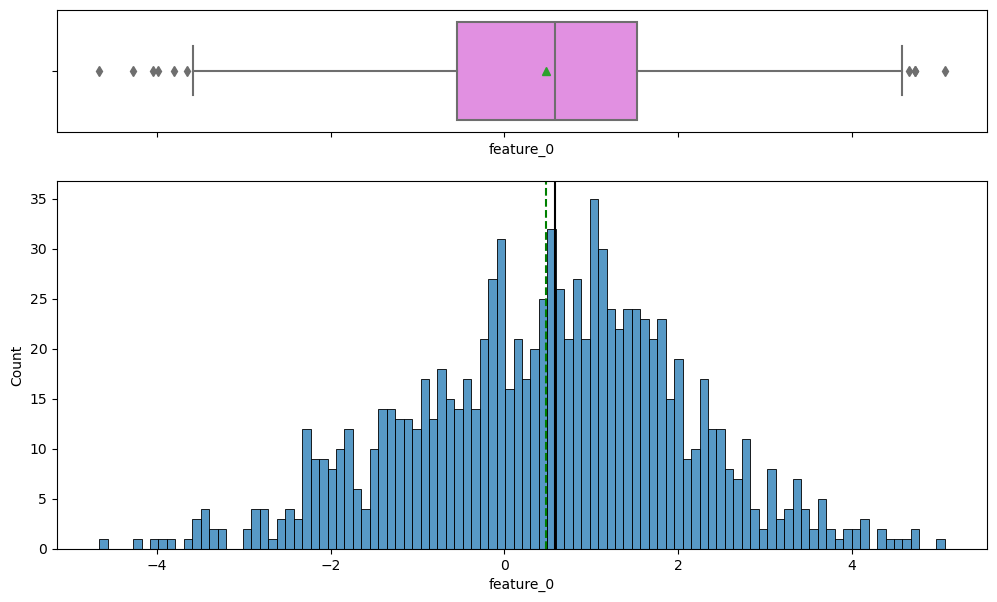

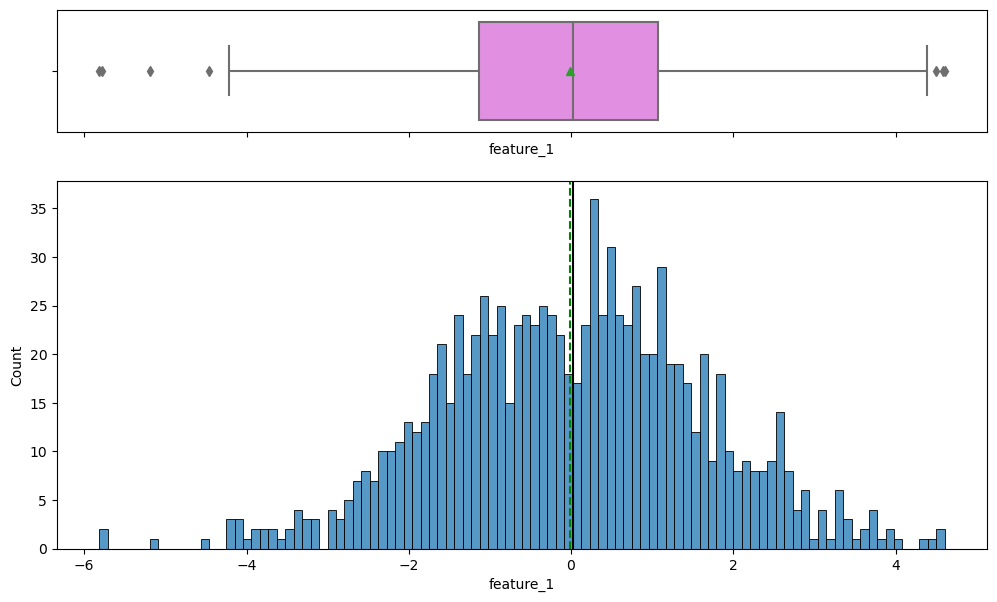

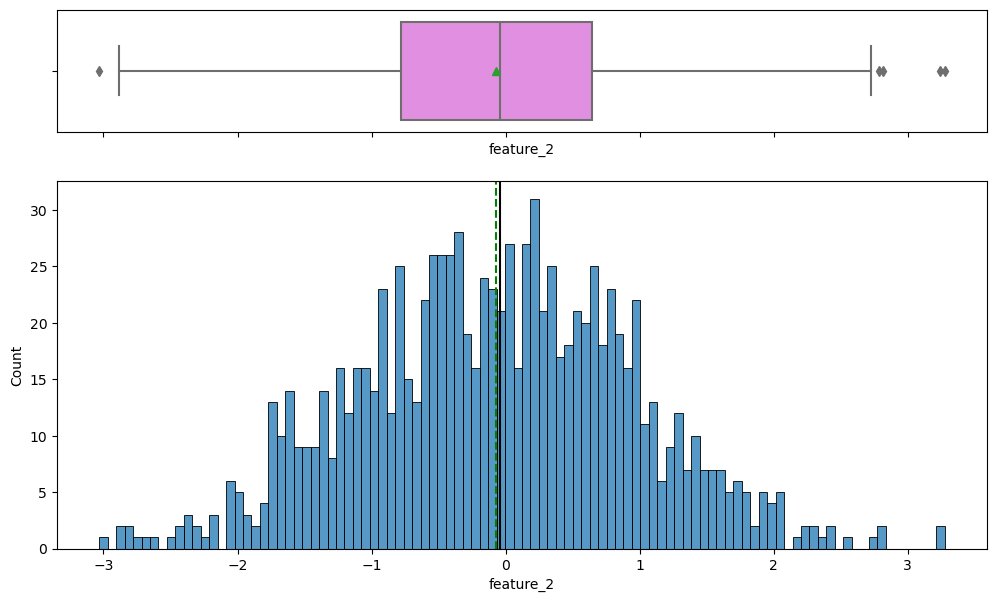

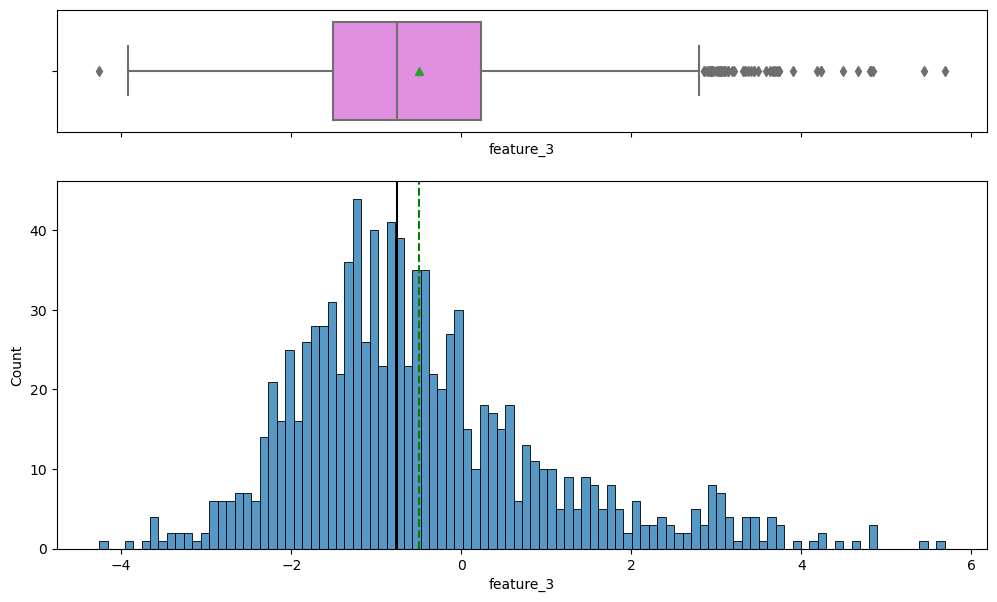

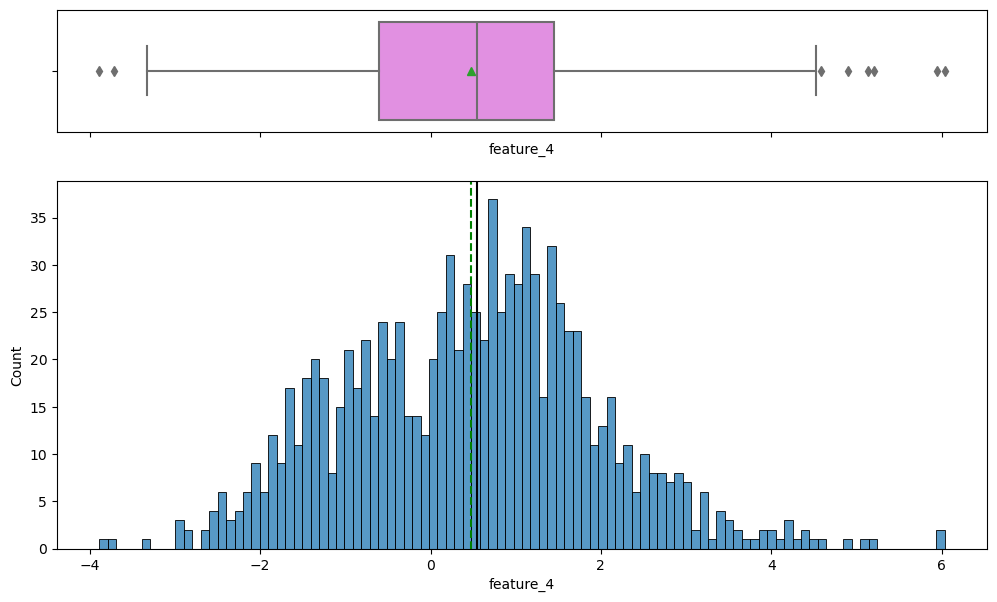

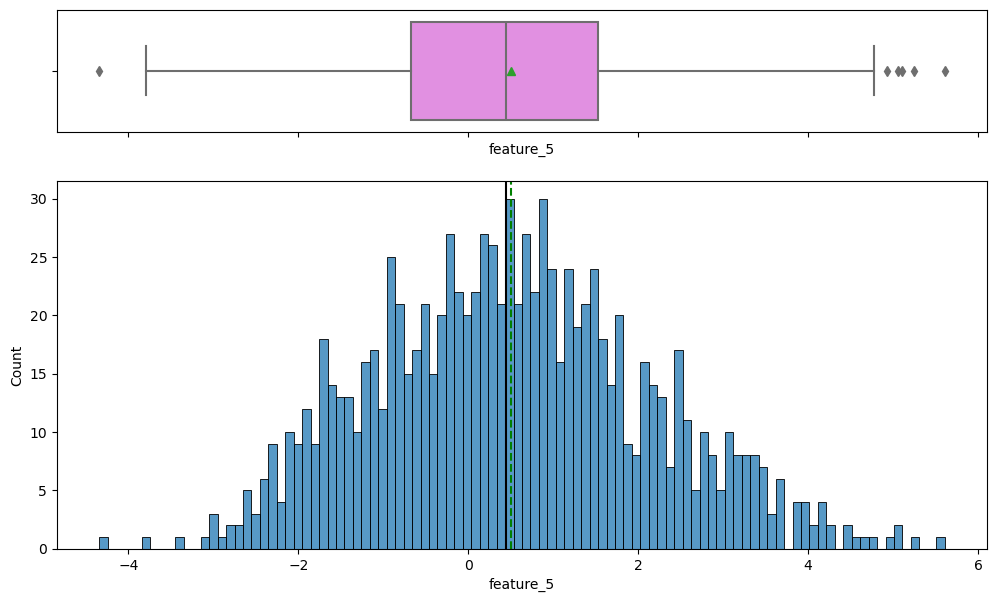

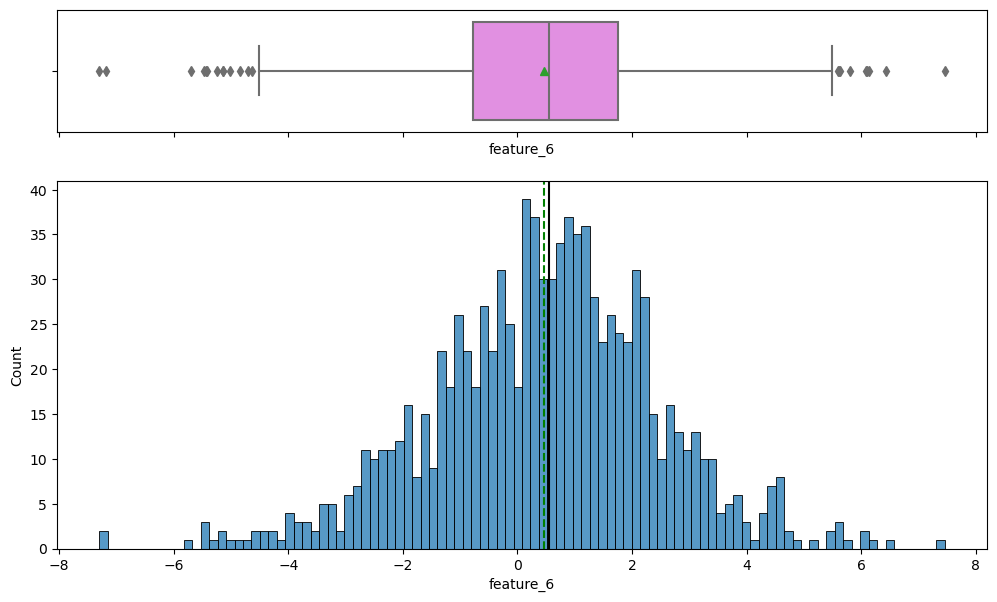

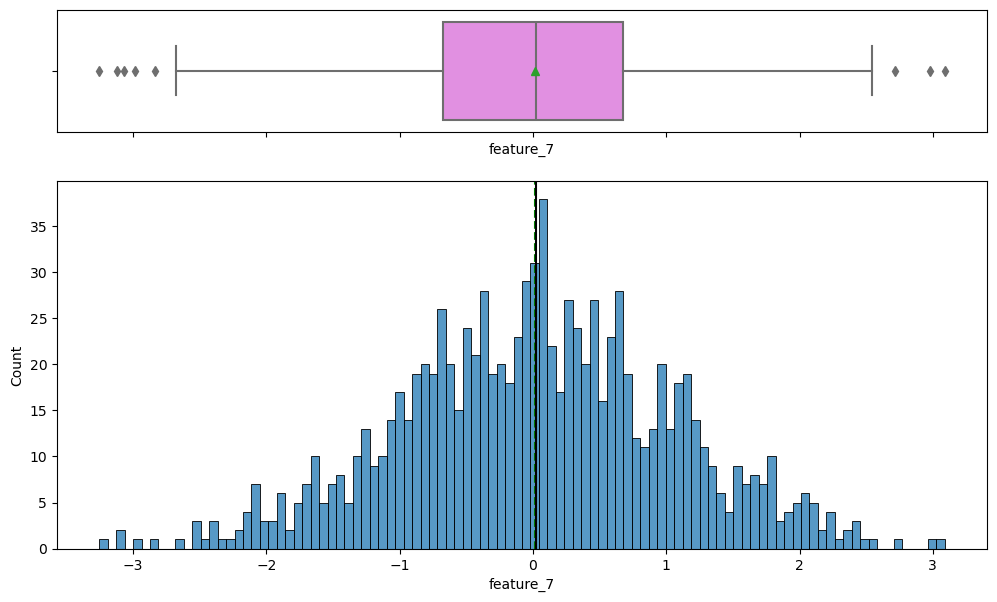

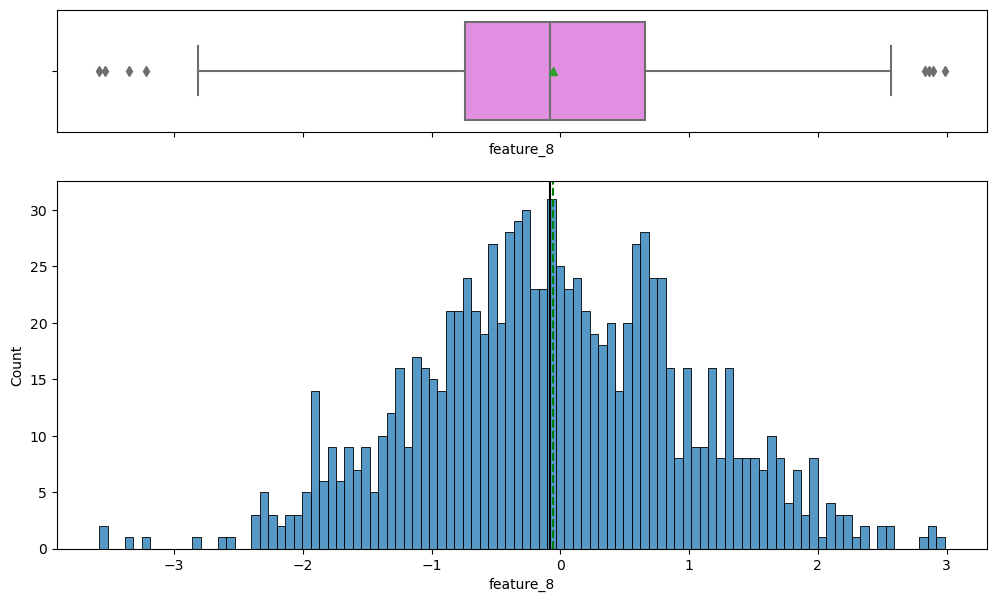

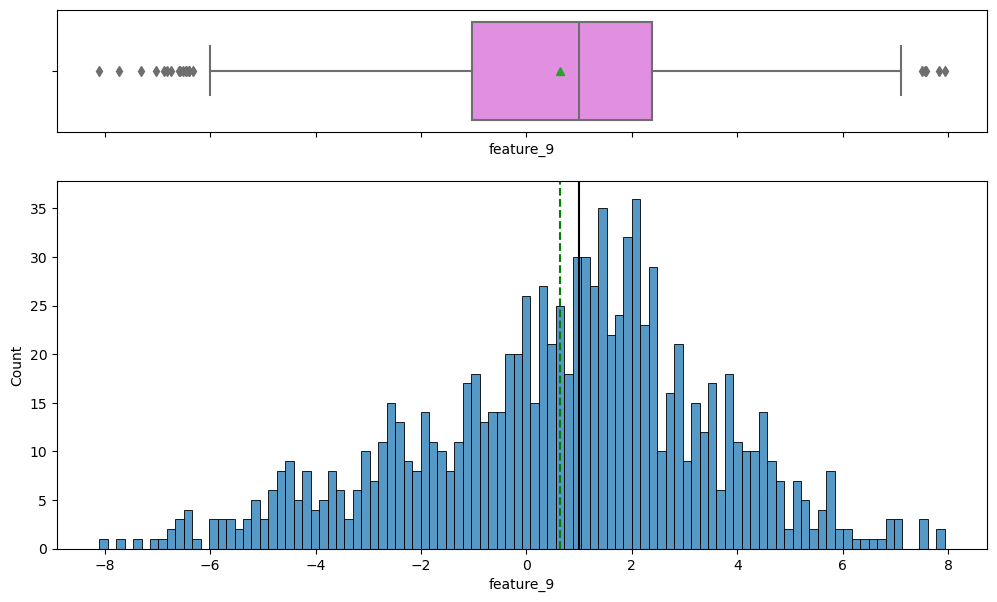

In [13]:
for i in con_columns:
    #print('Histogram and Bobplot view............. for the feature of ',i)
    histogram_boxplot(data, i, bins=100)

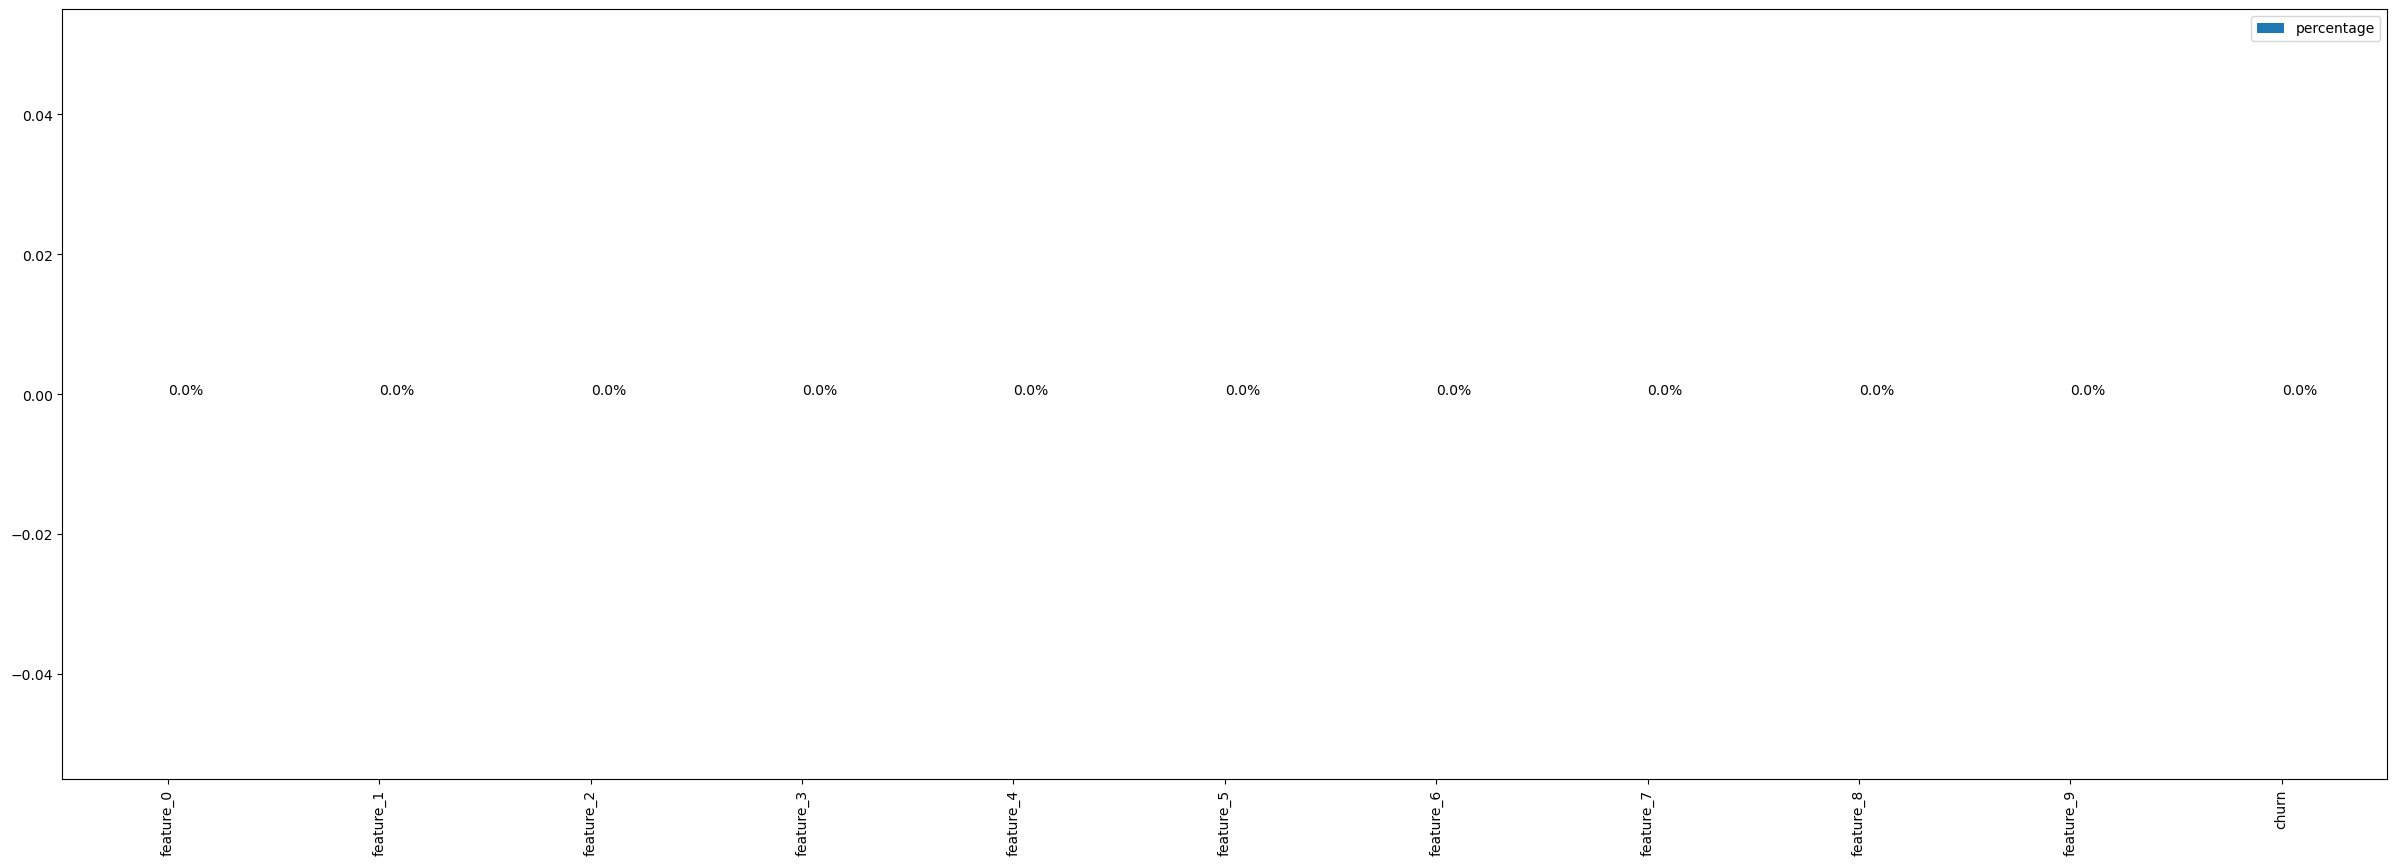

In [14]:
missing_count_df = data.isnull().sum() # the count of missing value
value_count_df = data.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

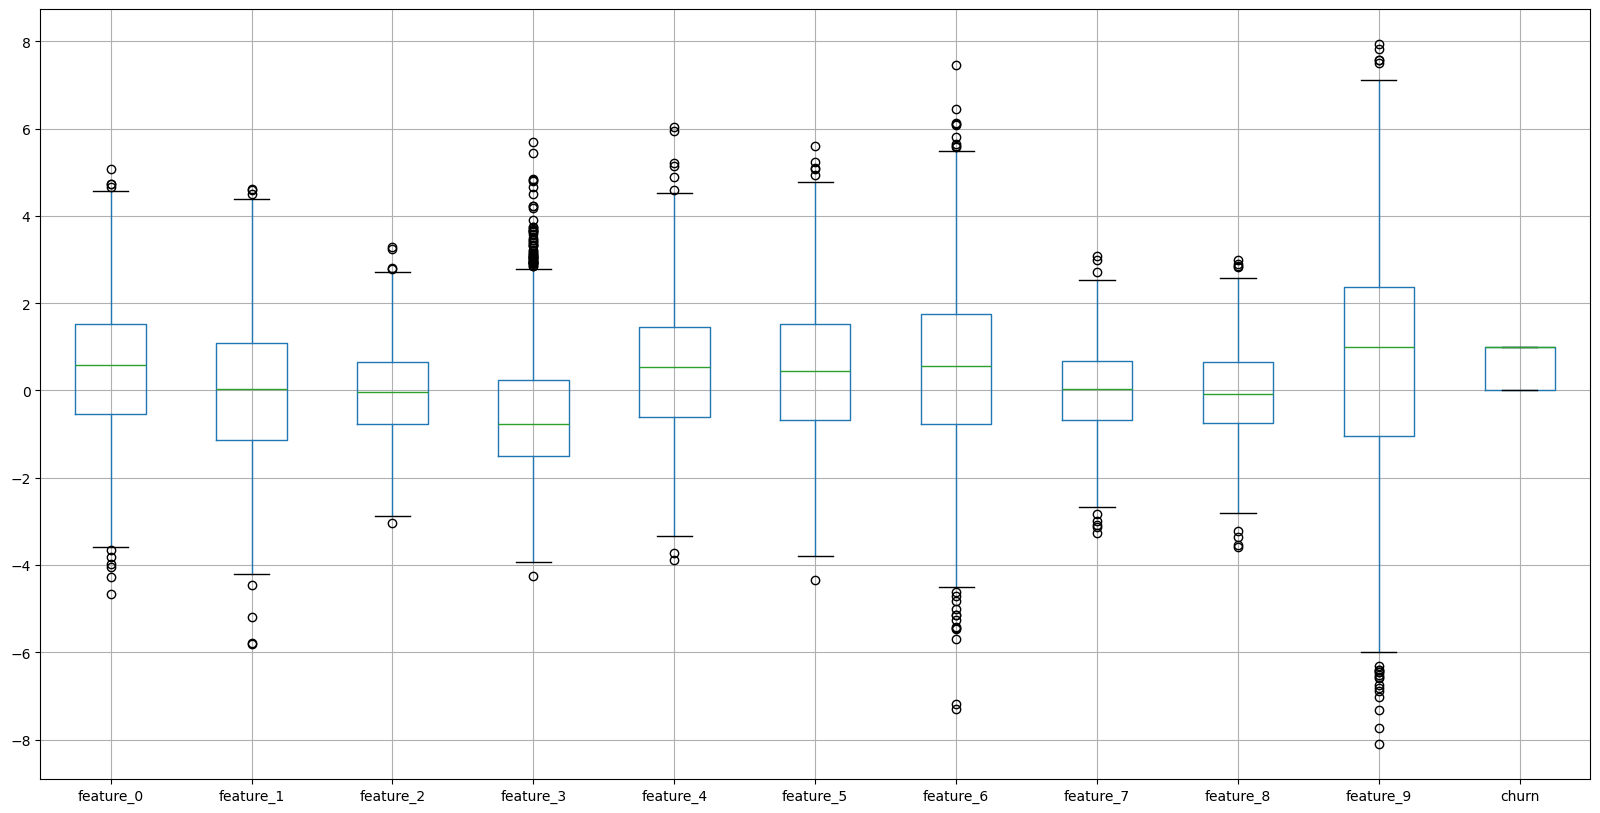

In [15]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

 ## 3.2 Outlier treatment

In [16]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

11

In [17]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in data[lstnumericcolumns].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])


## 3.3 after outlier treatmnt Box plot and hist plot

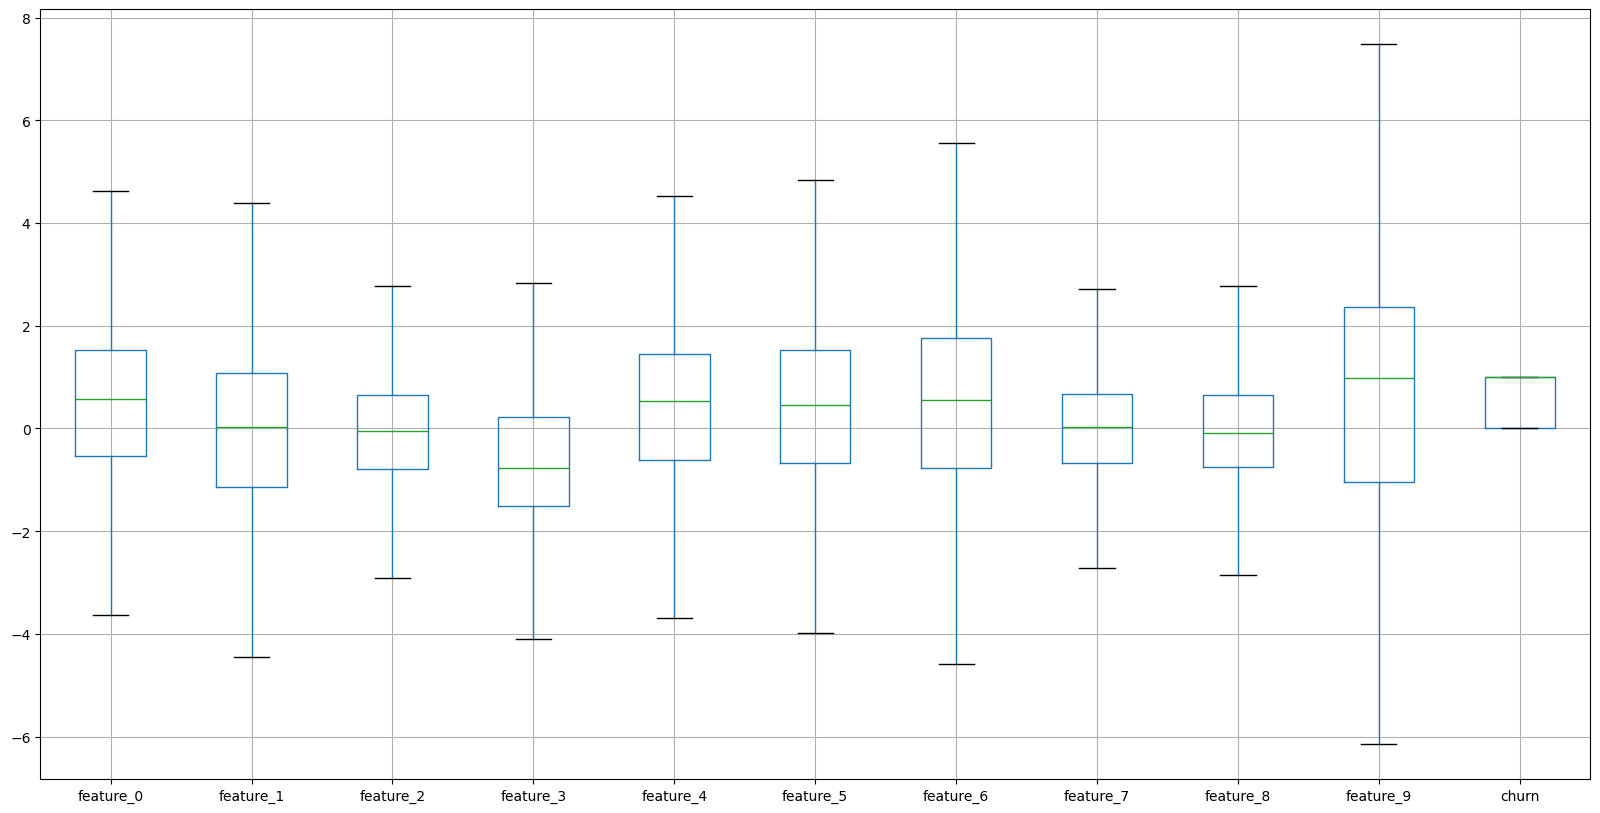

In [19]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

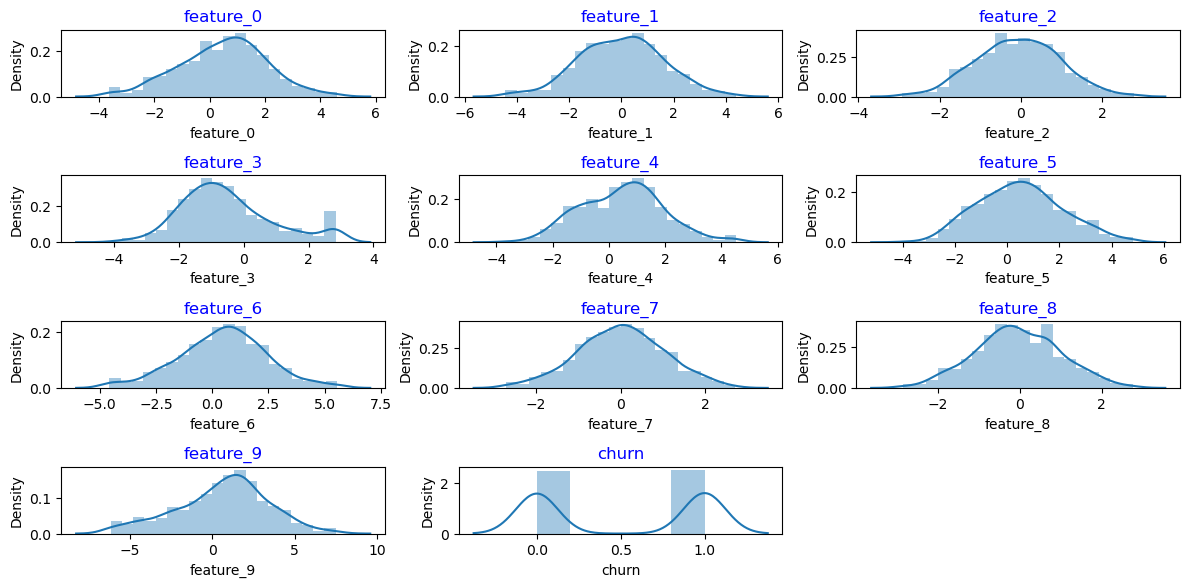

In [20]:
data_plot=data[data.dtypes[data.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

## 3.3 Bivariate Analysis

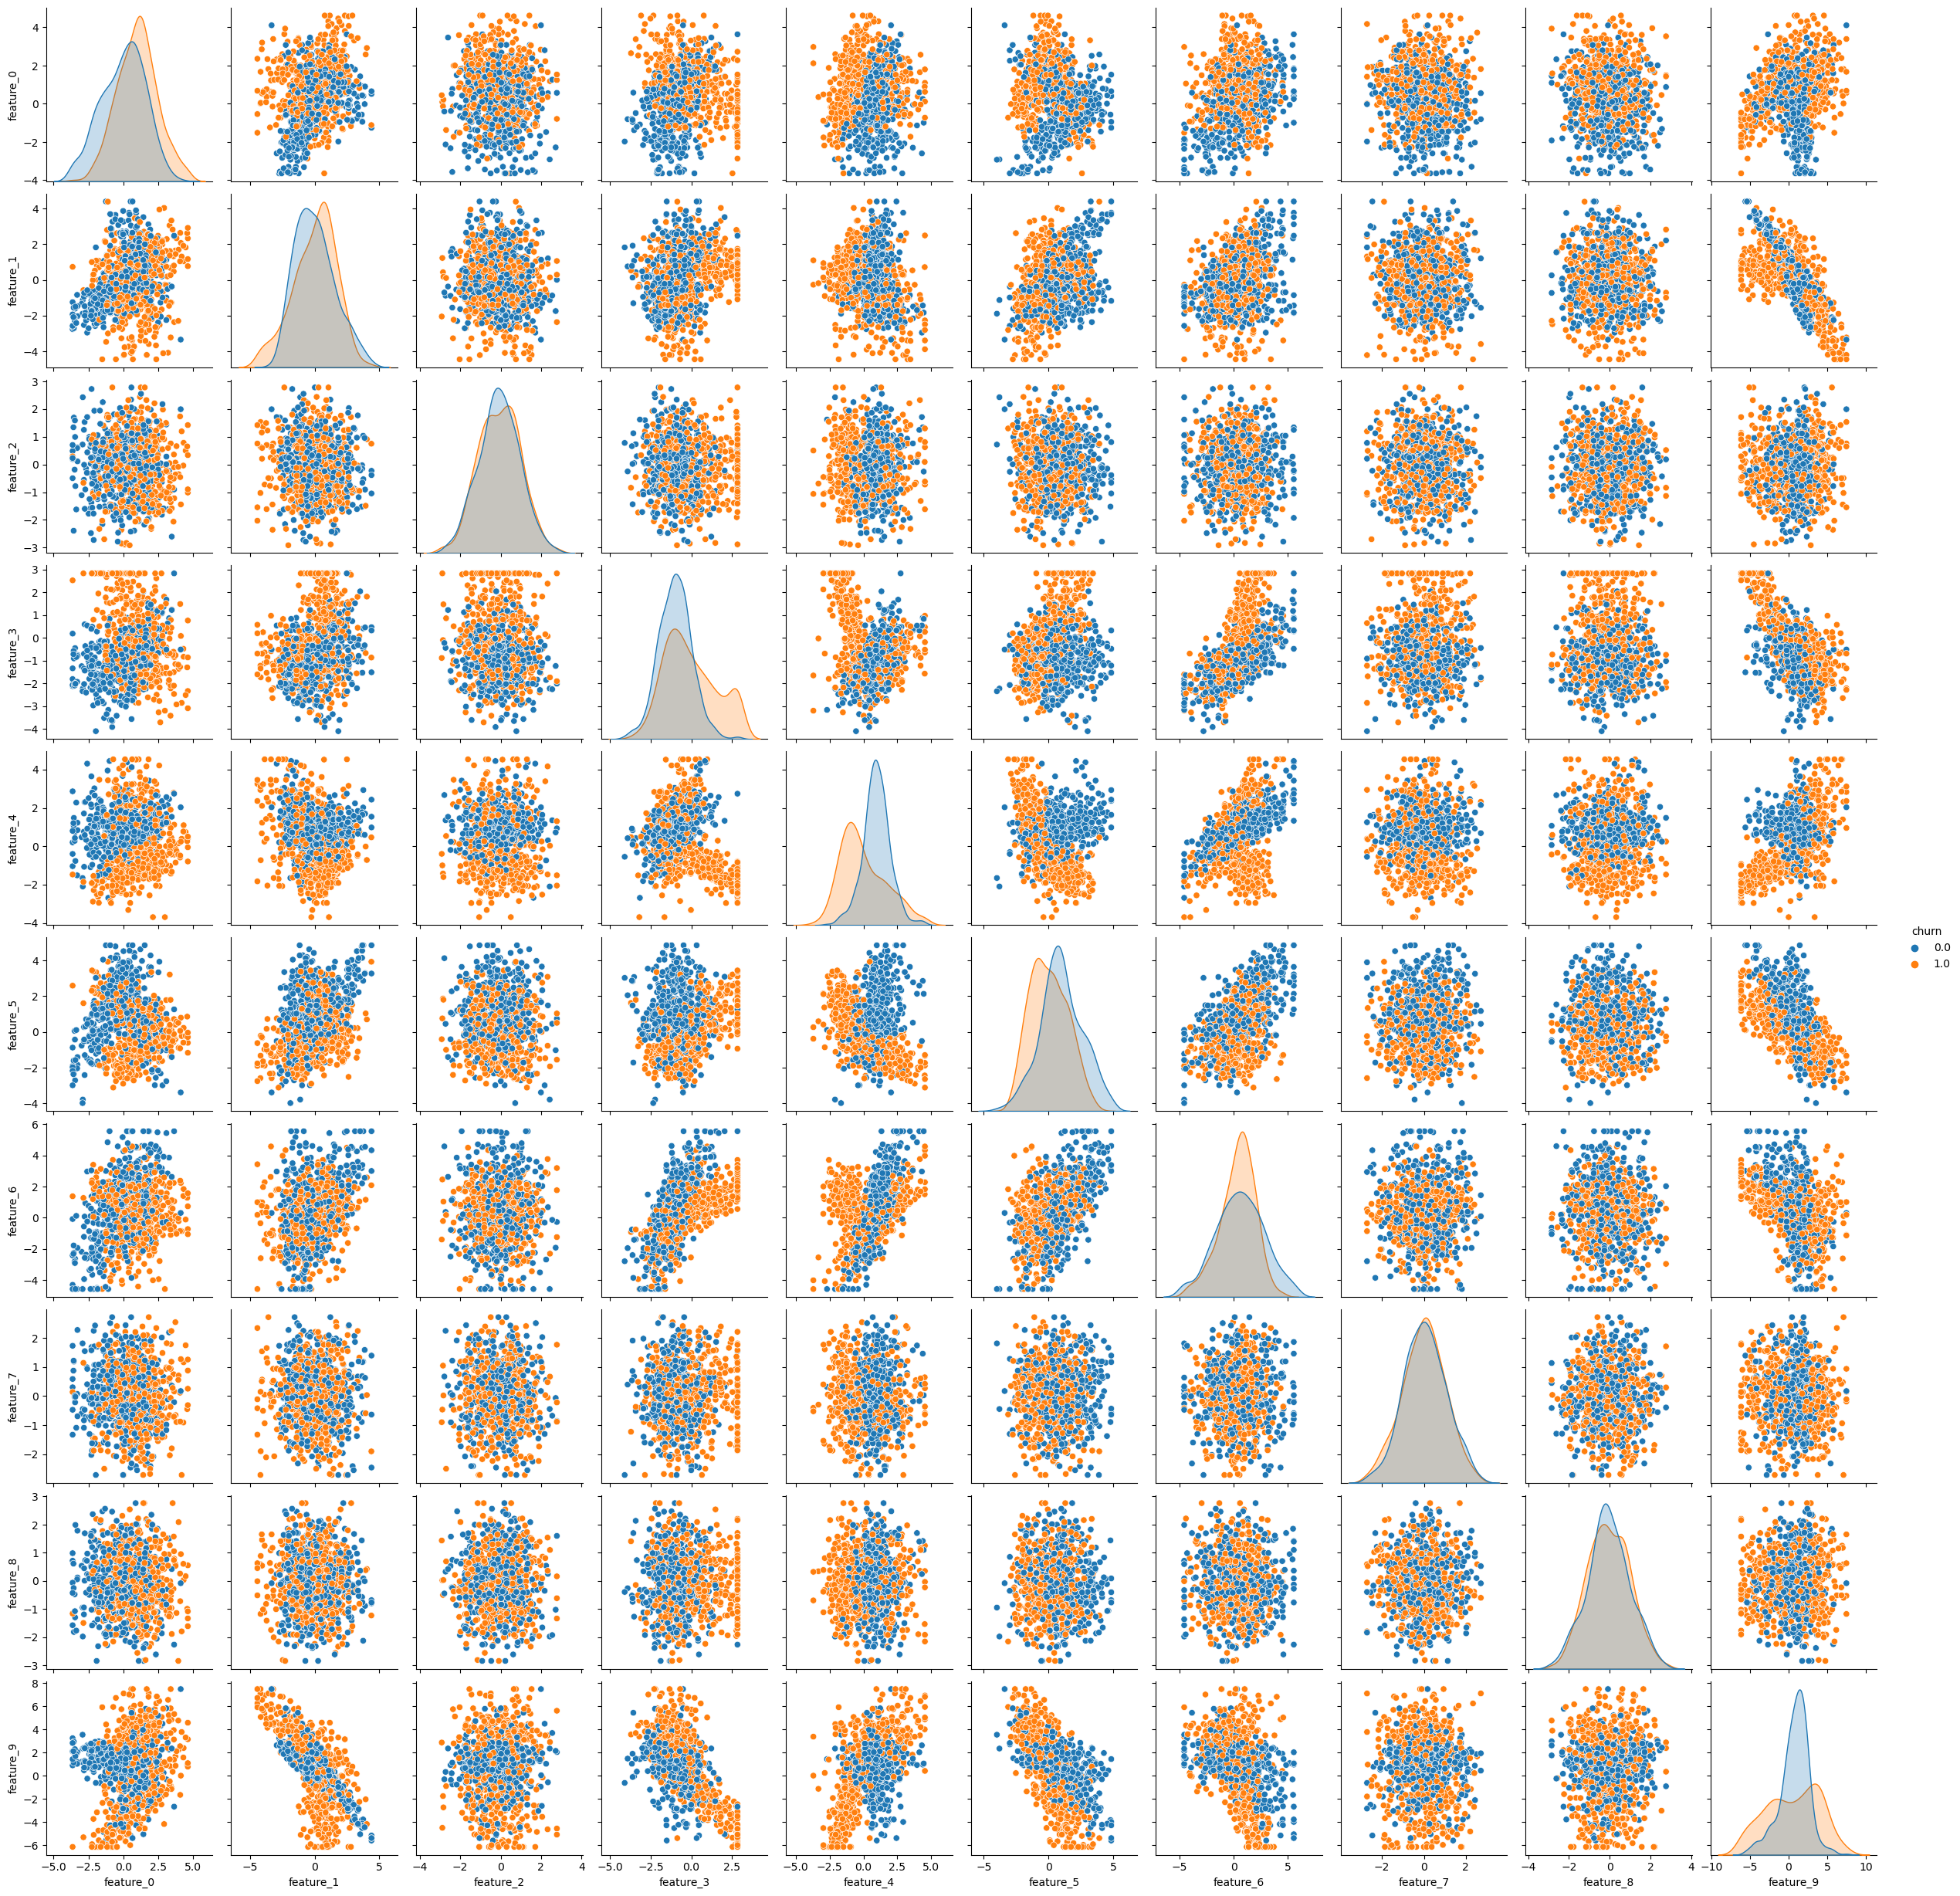

In [21]:
sns.pairplot(data, hue='churn')

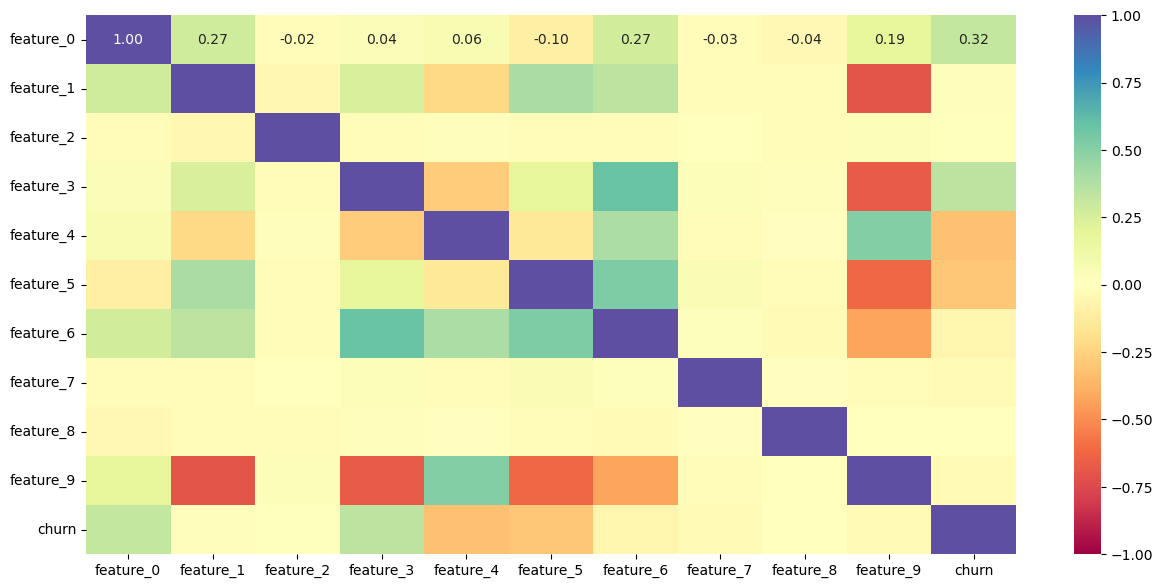

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

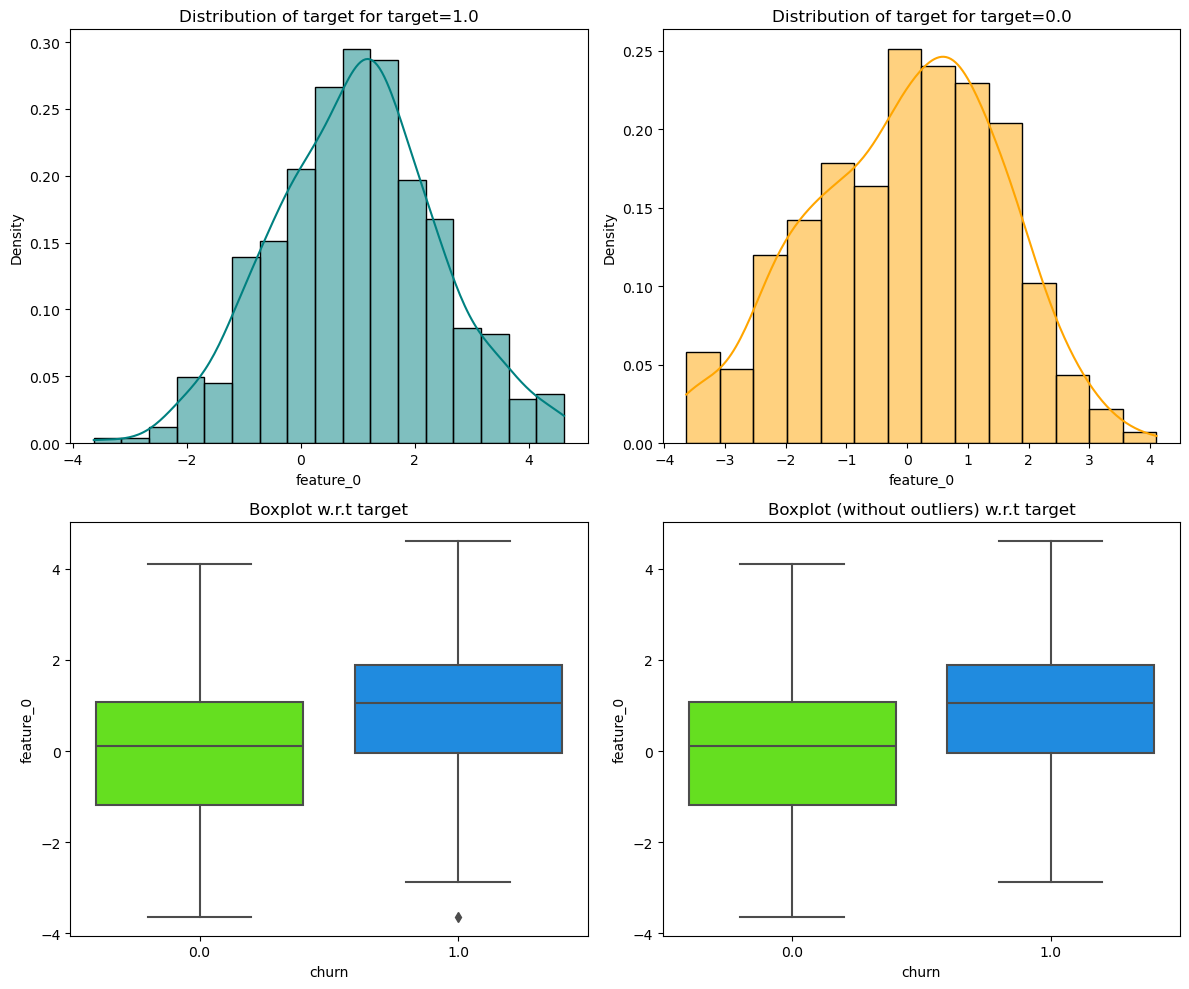

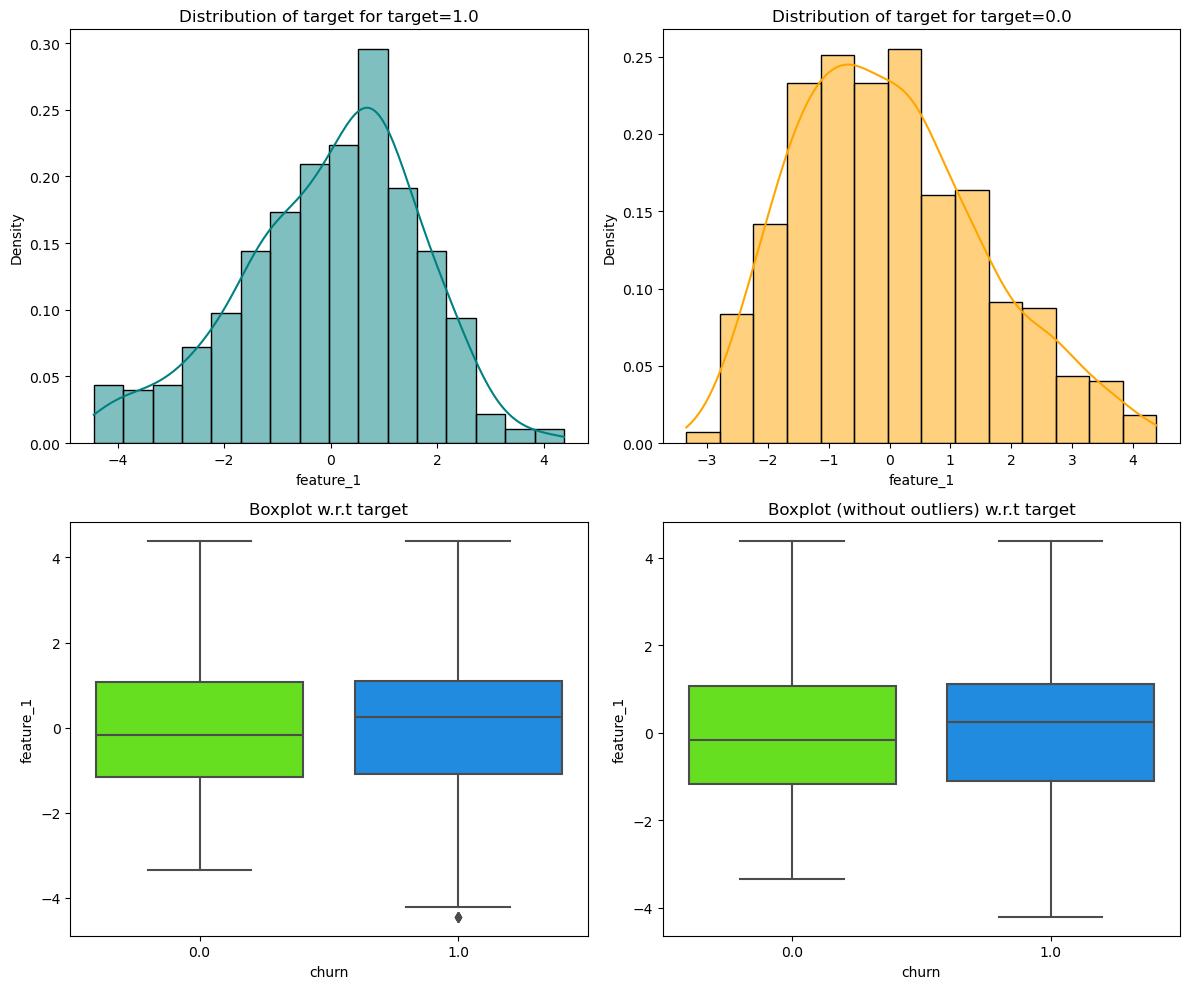

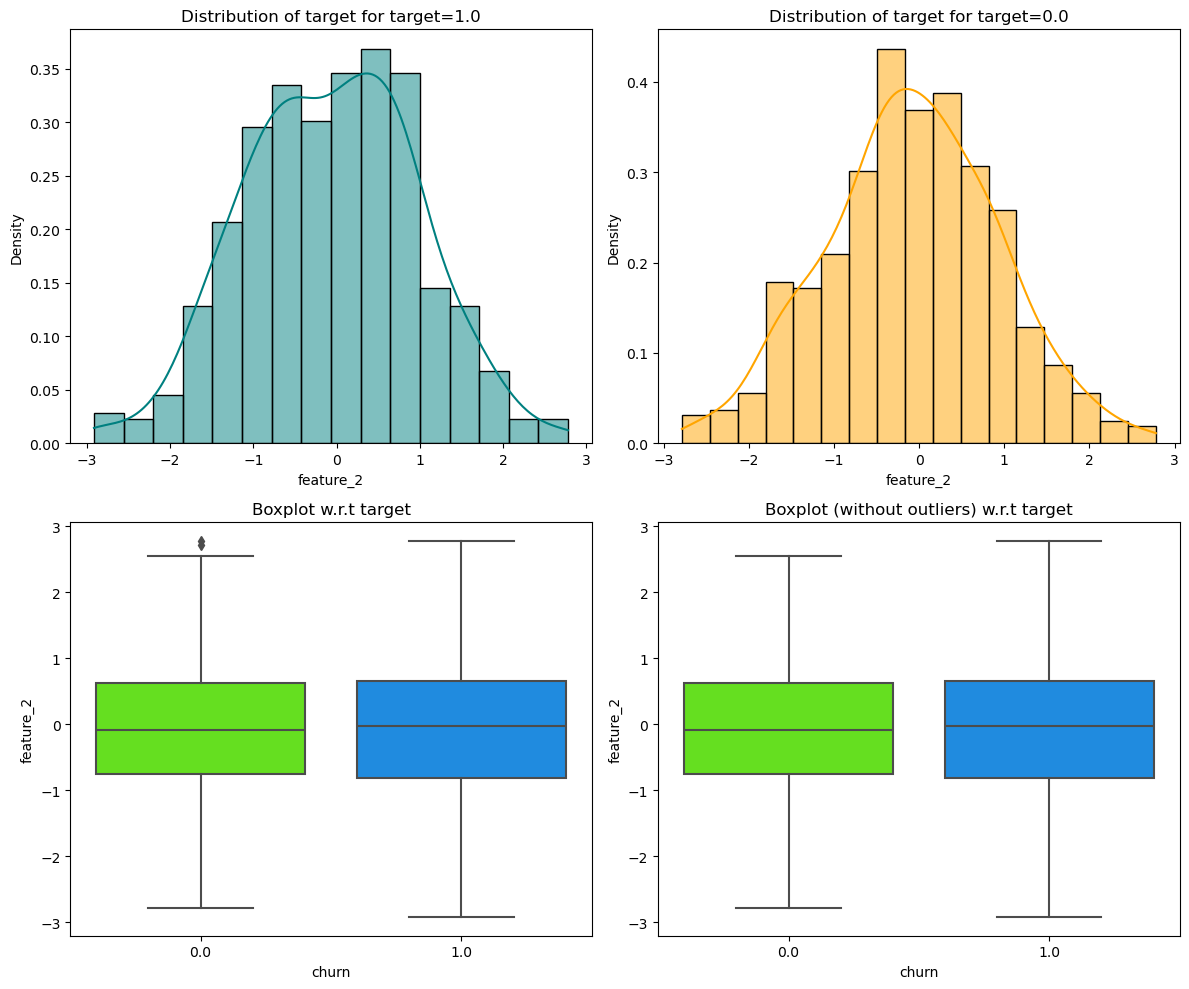

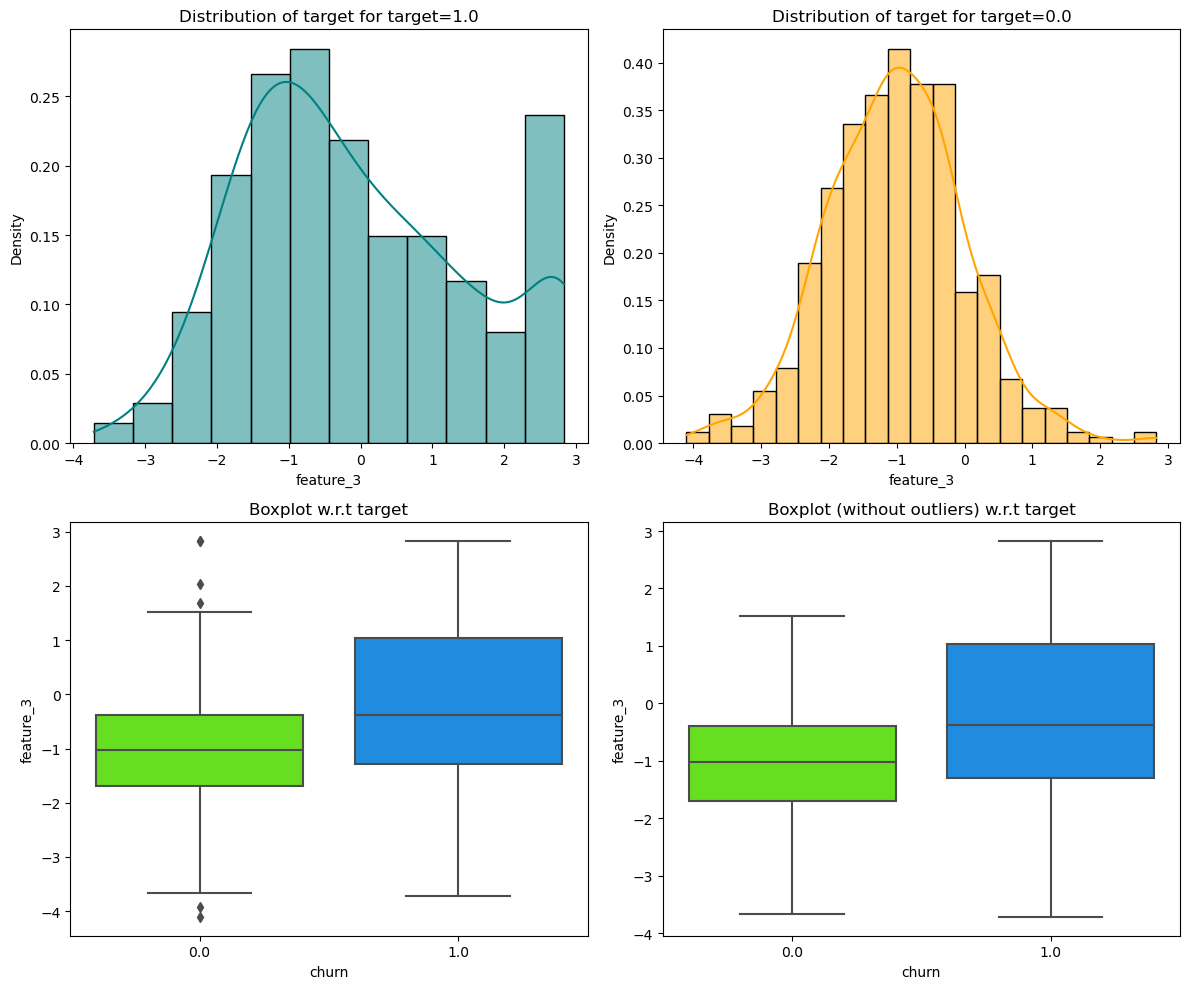

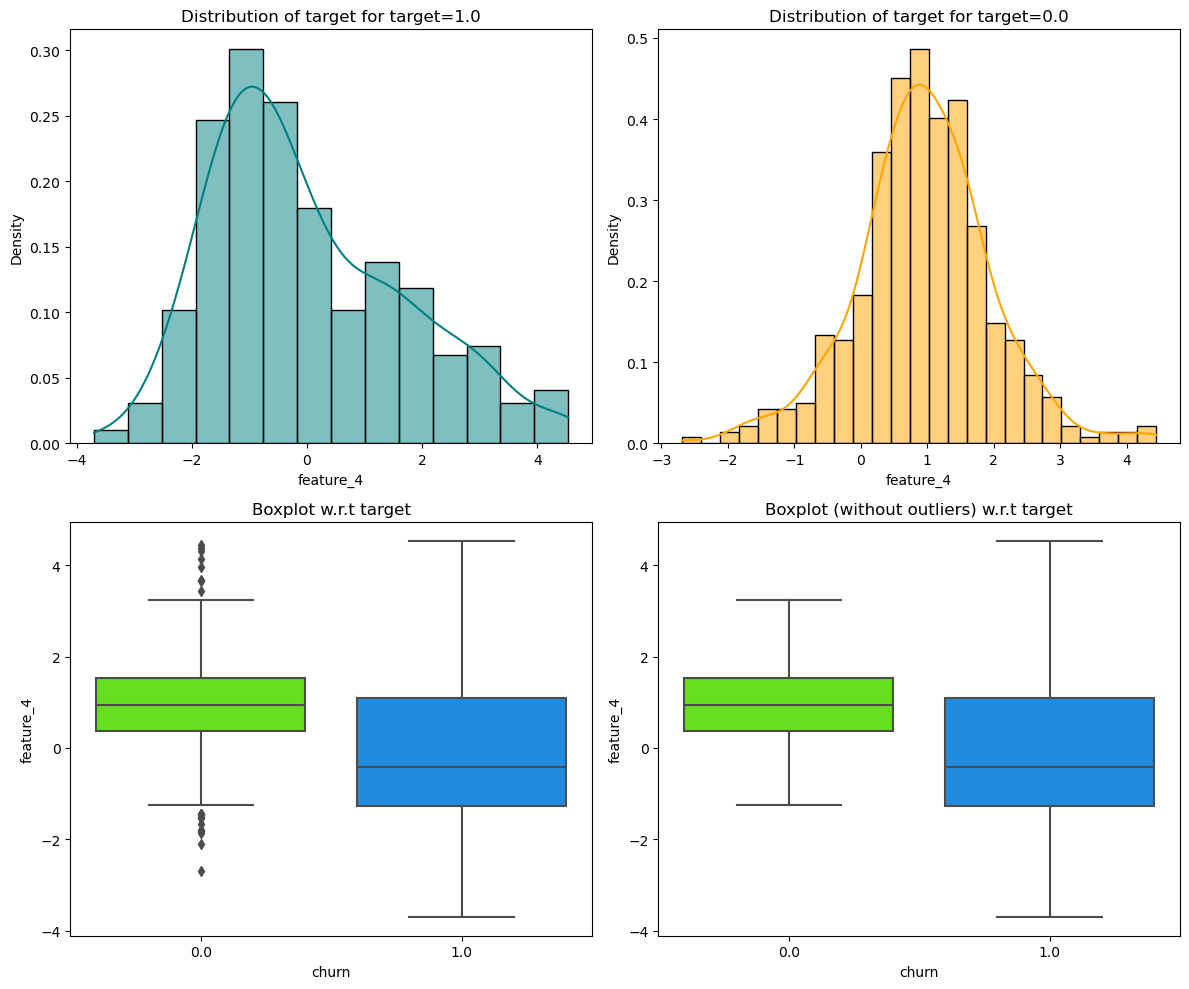

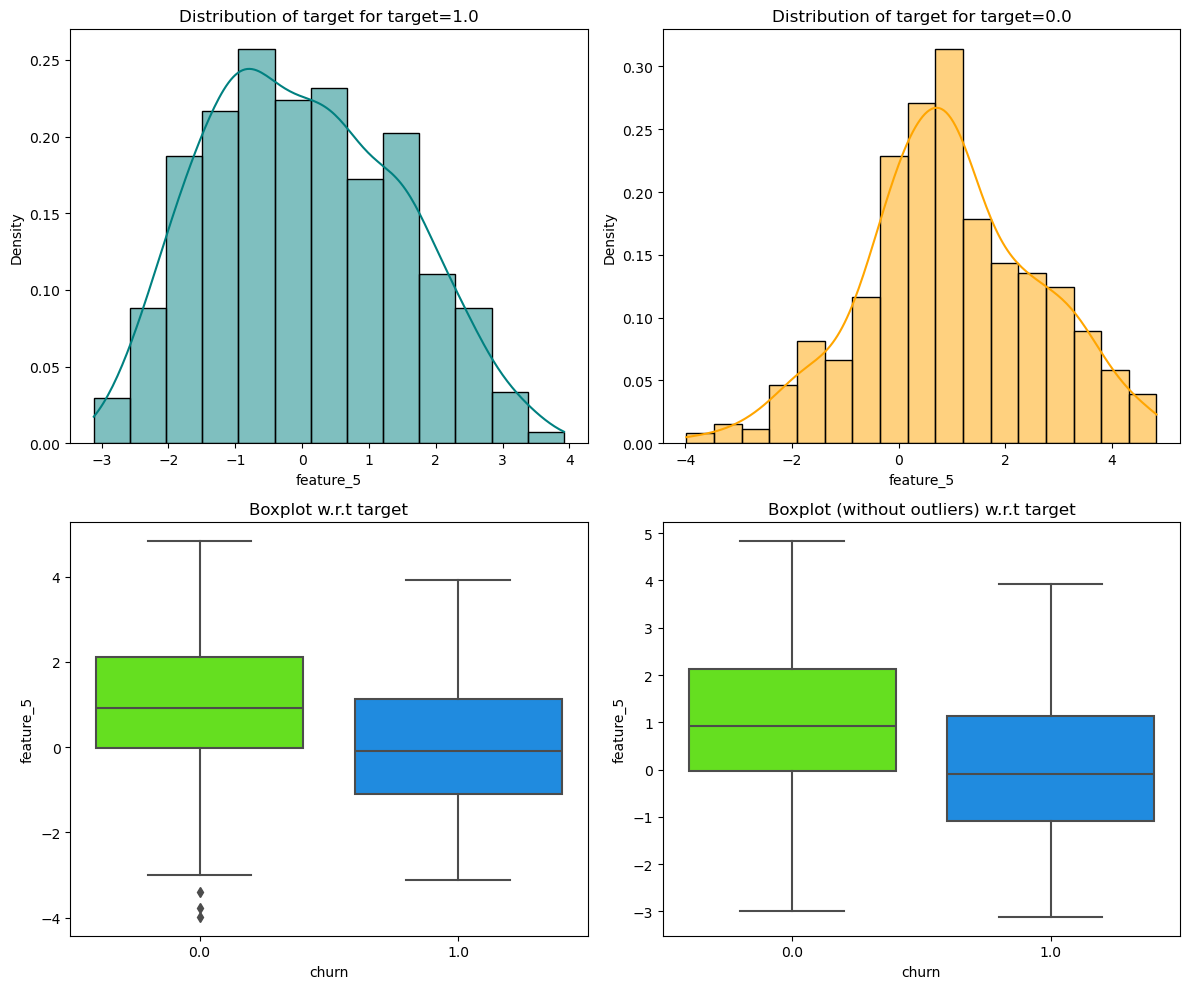

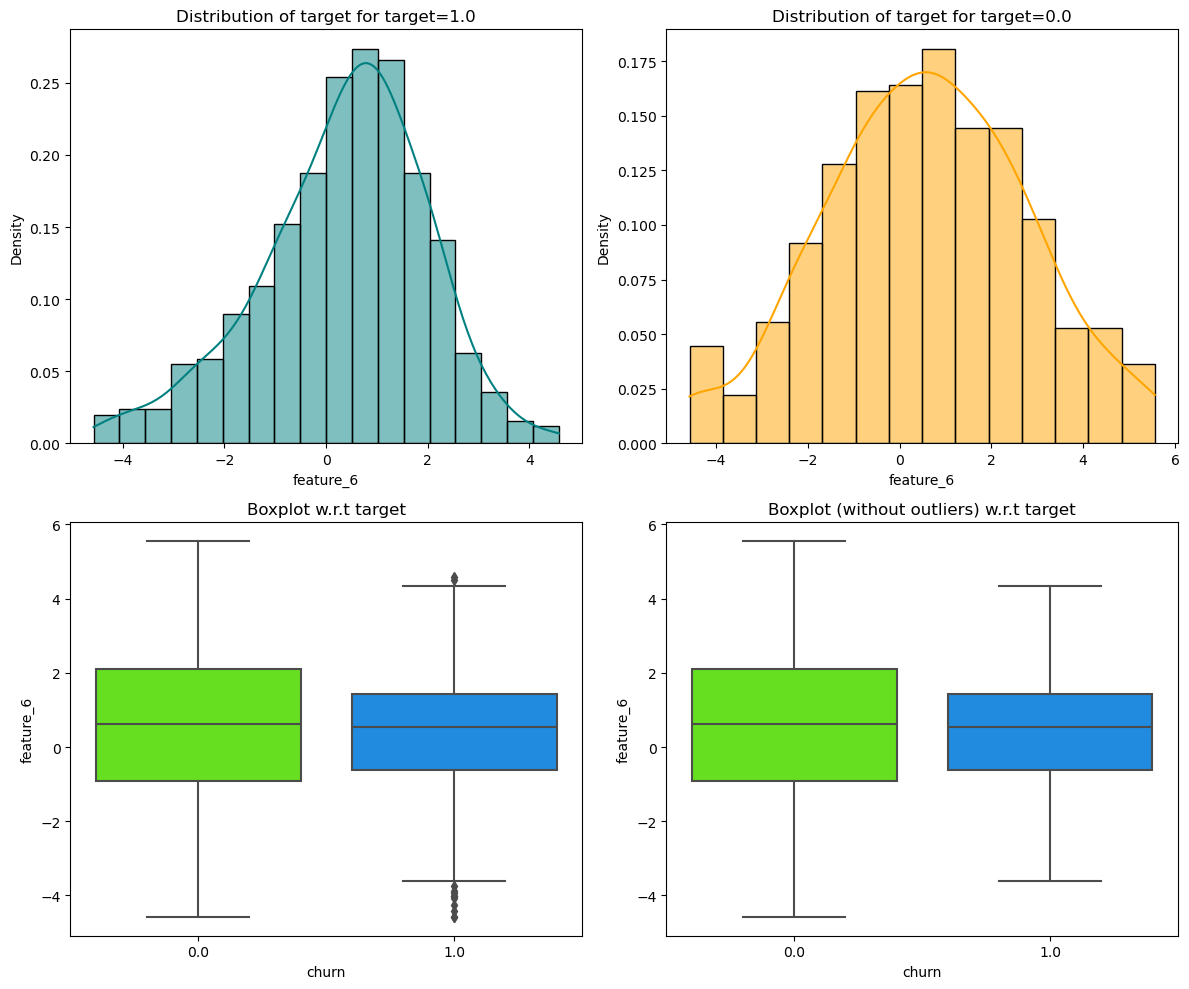

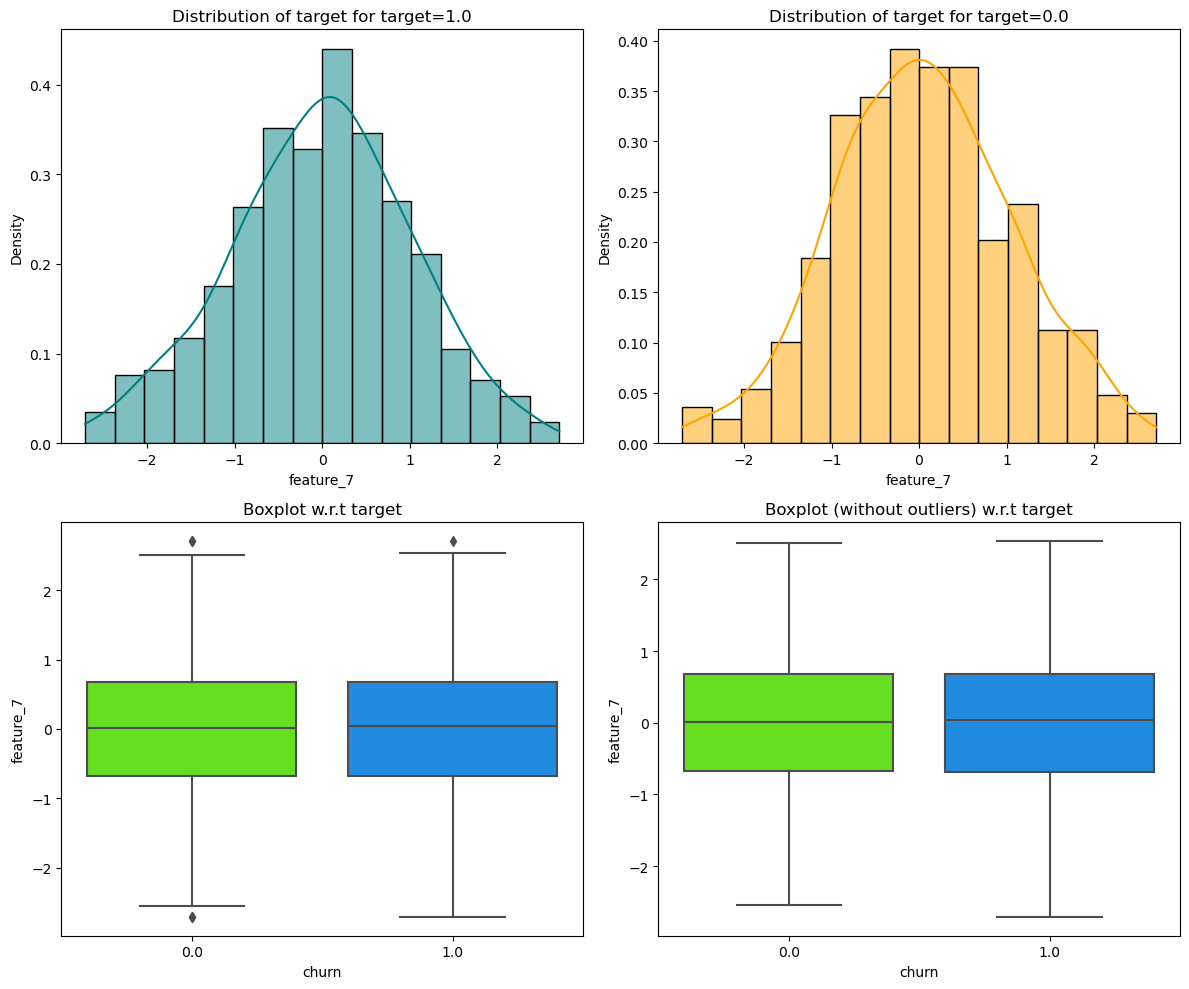

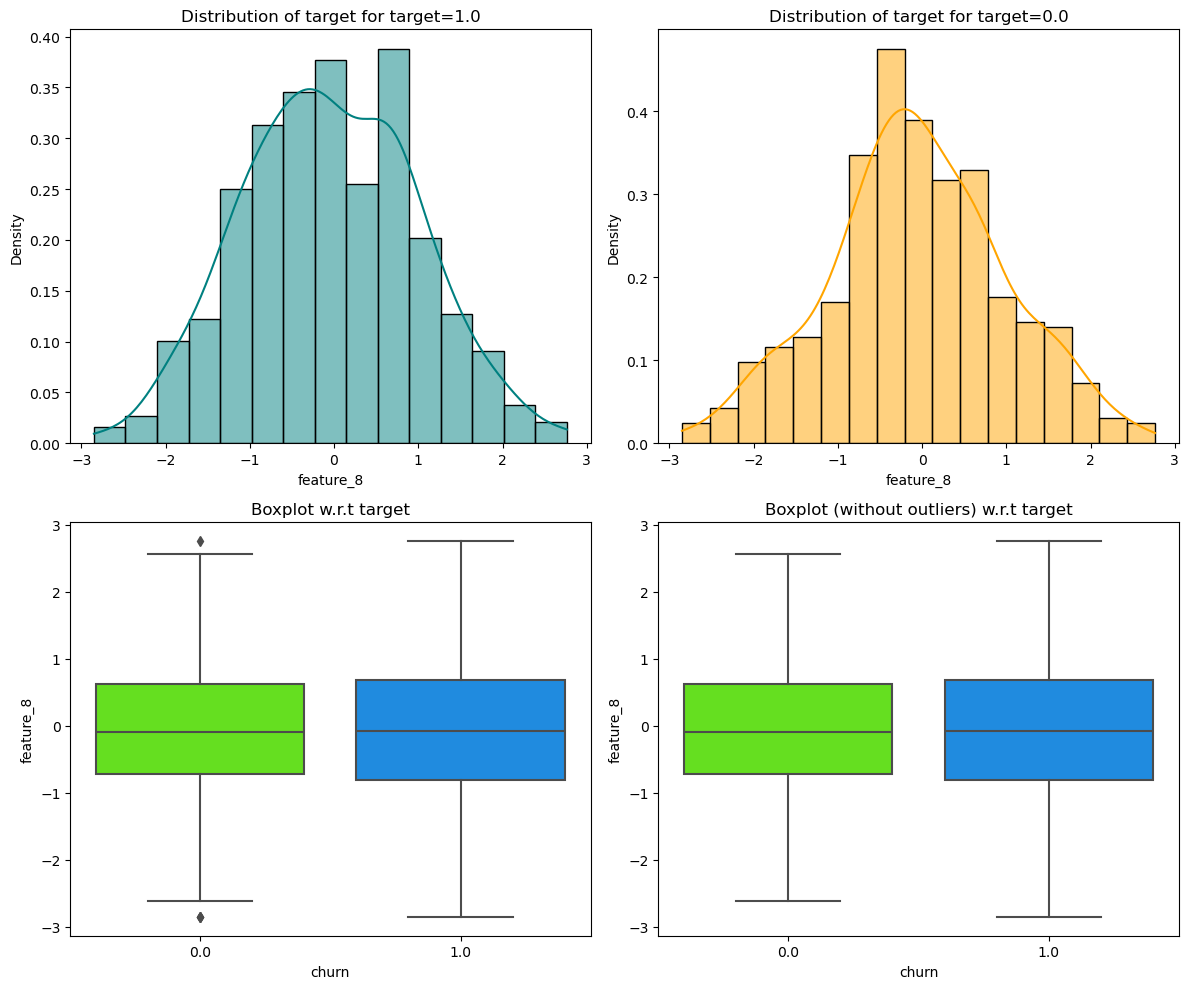

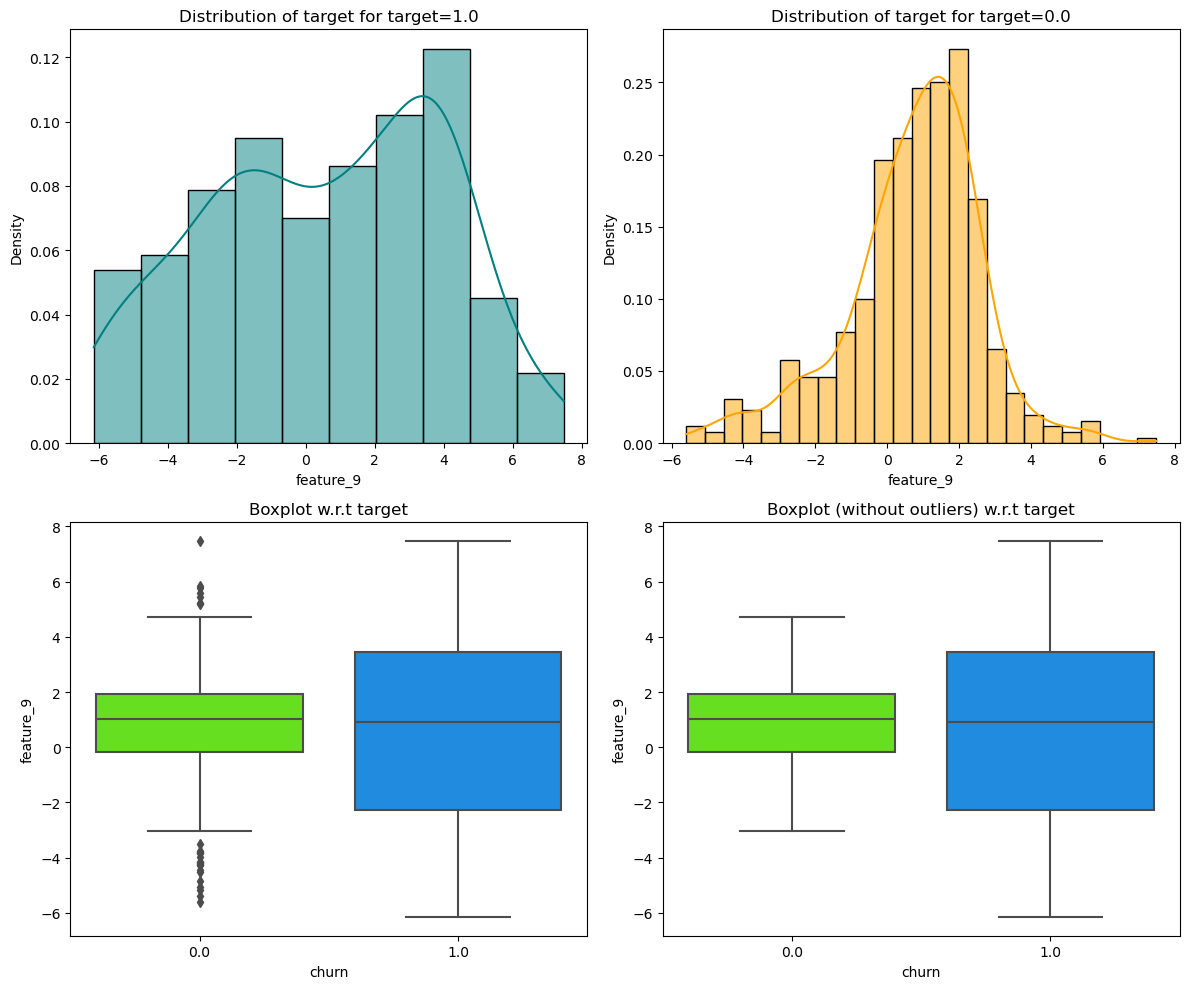

In [24]:
for i in con_columns:
    #print('Histogram and Bobplot view............. for the feature of ',i)
    distribution_plot_wrt_target(data, i, "churn")


# Creating training and test sets

In [25]:
X = data.drop(["churn"], axis=1)
Y = data["churn"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [26]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (700, 10)
Shape of test set :  (300, 10)
Percentage of classes in training set:
churn
1.0    0.501429
0.0    0.498571
Name: proportion, dtype: float64
Percentage of classes in test set:
churn
1.0    0.506667
0.0    0.493333
Name: proportion, dtype: float64


In [27]:
import pandas as pd

# Load data
data = pd.read_csv("churn_data.csv")

# Preprocessing steps (e.g., handle missing values, encode categorical features)
# data["missing_value"] = data["feature_2"].fillna(-1)
# data = pd.get_dummies(data, columns=["feature_7"])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(data.drop("churn", axis=1), data["churn"], test_size=0.2, random_state=42)

In [28]:

import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow

#if __name__ == "__main__":
    
X = data.drop(["churn"], axis=1)
Y = data["churn"]
X = pd.get_dummies(X, drop_first=True)
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
lr =RandomForestClassifier(random_state=42)
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_id="0")
mlflow.autolog()
lr.fit(X, y)

from sklearn.metrics import accuracy_score

# Evaluate model performance
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

score = lr.score(X, y)
print("Score: %s" % score)
mlflow.log_metric("score", score)
mlflow.sklearn.log_model(lr, "model")

from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50,75,100, 200, 300],
    "max_depth": [5, 10, 15]
}

# Tune model using GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get best model and score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print(f"Best Model Score: {best_score}")

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Log metrics to MLflow
with mlflow.start_run():
    mlflow.log_param("best_params", grid_search.best_params_)  # Log best parameters
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.sklearn.log_model(best_model, "model")

print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
run_id_best=mlflow.active_run().info.run_uuid

MlflowException: API request to http://localhost:5000/api/2.0/mlflow/experiments/get failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get?experiment_id=0 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DE54D10450>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import mlflow

# Assuming data is properly defined

# Load and preprocess data
X = data.drop(["churn"], axis=1)
Y = data["churn"]
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Initialize RandomForestClassifier
lr = RandomForestClassifier(random_state=42)

# Set MLflow tracking URI and experiment ID
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_id="0")

# Enable MLflow autologging
mlflow.sklearn.autolog()

# Fit model
lr.fit(X_train, y_train)

# No need to manually log accuracy and model if autologging is enabled

# Optionally, log additional metrics or parameters
# mlflow.log_metric("score", score)
# mlflow.sklearn.log_model(lr, "model")


MlflowException: API request to http://localhost:5000/api/2.0/mlflow/experiments/get failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get?experiment_id=0 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DE4806AD10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow

# Define parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50, 75, 100, 200, 300],
    "max_depth": [5, 10, 15]
}

# Tune model using GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get best model and score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print(f"Best Model Score: {best_score}")

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Compute evaluation metrics using predictions from the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# Log metrics to MLflow
with mlflow.start_run():
    mlflow.log_param("best_params", grid_search.best_params_)  # Log best parameters
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.sklearn.log_model(best_model, "model")

print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
run_id_best = mlflow.active_run().info.run_uuid


Best Model Score: 0.9328571428571427


# Load model

In [ ]:
X.to_csv("input_new.csv",index=False)
input=pd.read_csv("input_new.csv")

In [ ]:
run_id_best

In [ ]:
import mlflow.pyfunc

# Get the run ID of the best run
run_id_best = mlflow.active_run().info.run_uuid

# Construct the URI for the model based on the run ID
model_uri = "runs:/{}/model".format(run_id_best)

# Load the model using the model URI
model = mlflow.pyfunc.load_model(model_uri)

In [ ]:
predictions=model.predict(input)
my_predictions=pd.DataFrame(predictions)
my_predictions.columns =['churn']

output=input.join(my_predictions)
output.to_csv("output.csv", index=False)

In [ ]:
output.head()